## Simple Linear Regression

Linear regression is  a linear or straight line relationship between the input variables (X) and the single output variable (y).

<img src='images/lr.png' width="45%"/>

### Let us consider a dataset where we have a value of response y for every feature x:

In [1]:
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

### x as a feature vector and y as a response vector

In [ ]:
#x = np.array([1,2,3,4,5])
#y =  np.array([5,4,6,5,6])

### A scatter plot of above dataset looks like:-

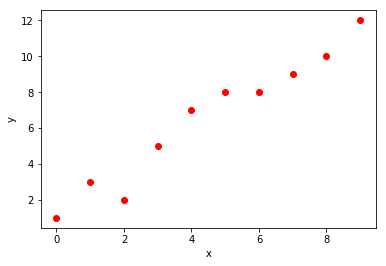

In [2]:

import matplotlib.pyplot as plt
#from matplotlib import style
#style.use('ggplot')

plt.scatter(x,y,color='red')

# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#### Now, the task is to find a line which fits best in above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in dataset)

- This line is called regression line.

<img src="images/lin_reg.PNG" width="20%"/>
<img src="images/bfind.PNG" width="90%"/>

In [ ]:
### find m and b

In [4]:
def best_fit_slope(x,y):
    m= (((np.mean(x)*np.mean(y))-np.mean(x*y))/
        ((np.mean(x)**2)-np.mean(x**2)))
    b = np.mean(y) - m*np.mean(x)
   
    return m,b

In [5]:
m,b = best_fit_slope(x,y)
print m,b

1.1696969697 1.23636363636


In [6]:
regression_line = [(m*i+b) for i in x]
#regression_line

In [7]:
predict_x=10
#y=mx+b
predict_y=(m*predict_x)+b
print predict_y

12.9333333333


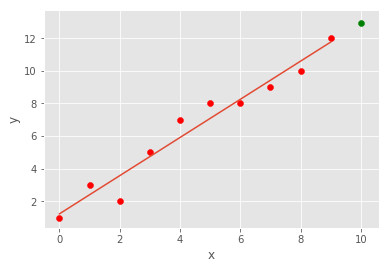

In [8]:
# for visualization
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


plt.scatter(x,y,color='red')
plt.scatter(predict_x,predict_y,color='green')
plt.plot(x, regression_line)

# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### R^2 (coefficient of determination):regression score function.


- The R^2 (or R Squared) metric provides an indication
  of the goodness of fit of a set of predictions to the
  actual values. In statistical literature,
  this measure is called the coefficient of determination.

- a model fits the data well if the differences between the
  observed values and the model's predicted values are small.

- R-squared is a statistical measure of how close the data
  are  to the fitted regression line.

- the higher the R-squared, the better the model fits your
  data.

- value between 0 and 1 

- The distance between the regression line's y values,
  and the data's y values is the error, then we square that. 


<img src='images/r2.PNG' width='40%'/>

### 1-((sum of the squared error of the line) / (sum of squared error of the y mean))

- **SE line** = (y1-(mx1+b))+(y2-(mx2+b))+.....(yn-(mxn+b))


- **SE y mean** = (y1-mean(y))+(y2-mean(y))+....(yn-mean(y))

if SE line is small ==> line is a good fit or r^2 close to 1

if SE line is large ===> r^2 close to 0 (i.e line is not fitted well)



<img src="rsq.png" />

In [9]:
def squared_error(ys_original,ys_line):
    return sum((ys_line-ys_original)**2)

In [10]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [11]:
r_squared = coefficient_of_determination(y,regression_line)
print(r_squared)

0.952538038614


### Now Using scikit-learn...

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [14]:
lg = LinearRegression()
lg.fit(x.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
t=np.array([10,12])

In [ ]:
t=t.reshape(-1,1)

In [15]:
y_predict = lg.predict(10)

In [16]:
y_predict

array([ 12.93333333])

In [18]:
print lg.coef_
print lg.intercept_

[ 1.16969697]
1.23636363636


In [19]:
r2_score(y,lg.predict(x.reshape(-1,1)))

0.952538038613988

In [20]:
y_pre = lg.predict(10)

In [21]:
y_pre

array([ 12.93333333])

### Take another example

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('dataset/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [24]:
X = data.iloc[:,0].values
X[:5]

array([ 1.1,  1.3,  1.5,  2. ,  2.2])

In [25]:
y = data['Salary'].values
y[:5]

array([ 39343.,  46205.,  37731.,  43525.,  39891.])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=5,random_state=0)

In [28]:
print X_train.shape
type(X_train)

(25L,)


numpy.ndarray

In [29]:
X_test

array([  1.5,  10.3,   4.1,   3.9,   9.5])

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
y_pred = lin_reg.predict(X_test.reshape(-1,1))

In [33]:
r2_score(y_test,y_pred)

0.98715792368087929

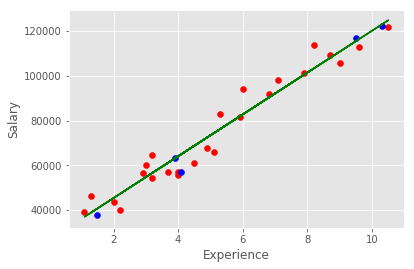

In [34]:
plt.scatter(X_train,y_train,color='red')   #training data
plt.scatter(X_test,y_test,color='blue')   #testing data
#plt.scatter(X_test,y_pred,color='black')   #testing data
plt.plot(X_train,lin_reg.predict(X_train.reshape(-1,1)),color='green')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
y_test,X_test

In [ ]:
y_pred

In [ ]:
x

In [ ]:
x.reshape(10,1).ndim